# **READ ME**  
**Author：WILD HORSE**
**数学建模小组成员：**  
队长 贾梓杏 SYSU-物理与天文学院2023级   
队员 夏解金鑫 SYSU-物理与天文学院2023级  
队员 刘张弛 SYSU-数学学院（珠海）2023级  
- Data和Explaination为官网给出数据集
- Data to cal M为数据预处理完成后的数据，可直接用于计算动量
- Data 4 Q4为第四问数据
*请大家务必记得检查自己是否安装对应库，以及替换文件地址*


### 设置LaTeX渲染永远是第一件事情

In [18]:
import matplotlib.pyplot as plt
# 启用LaTeX文本渲染
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

## **24C题** 

### **TASK ONE**  
***动量计算*** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
file_path = r'D:\FSS\MMM\MCM\24C\Data to cal M.xlsx'
df = pd.read_excel(file_path)

# 初始化变量
M1, M2 = 50, 50
prev_set_no = None
momentum_data = []

# 计算动量
for index, row in df.iterrows():
    # 判断是否是新的一场比赛
    if prev_set_no is not None and row['set_no'] < prev_set_no:
        M1, M2 = 50, 50
    
    # 更新动量
    Δ1, Δ2 = 0, 0
    
    # 发球影响
    if row['server'] == 1:
        if row['serve_no'] == 1:
            Δ1 += 5
        elif row['serve_no'] == 2:
            Δ1 -= 5
    elif row['server'] == 2:
        if row['serve_no'] == 2:
            Δ2 += 5
        elif row['serve_no'] == 1:
            Δ2 -= 5
    
    # ACE球影响
    Δ1 += 2 * row['p1_ace'] - 2 * row['p2_ace']
    Δ2 += 2 * row['p2_ace'] - 2* row['p1_ace']
    
    # Winner球影响
    Δ1 += 3 * row['p1_winner'] - 3 * row['p2_winner']
    Δ2 += -3 * row['p1_winner'] + 3 * row['p2_winner']
    
    # 双发失误影响
    Δ1 += -3 * row['p1_double_fault'] + 3 * row['p2_double_fault']
    Δ2 += 3 * row['p1_double_fault'] - 3 * row['p2_double_fault']
    
    # 失误影响
    Δ1 += -2 * row['p1_unf_err'] + 2 * row['p2_unf_err']
    Δ2 += 2 * row['p1_unf_err'] - 2 * row['p2_unf_err']
    
    # 上网得分影响
    Δ1 += 3 * row['p1_net_pt_won'] - 3 * row['p2_net_pt_won']
    Δ2 += -3 * row['p1_net_pt_won'] + 3 * row['p2_net_pt_won']
    
    # 对方发球而我方最终得分影响
    Δ1 += 3 * row['p1_break_pt_won'] - 3 * row['p2_break_pt_won']
    Δ2 += 3 * row['p2_break_pt_won'] - 3 * row['p1_break_pt_won']
    
    # 体能消耗影响
    Δ1 += -0.1 * row['p1_distance_run'] + 0.1 * row['p2_distance_run']
    Δ2 += 0.1 * row['p1_distance_run'] - 0.1 * row['p2_distance_run']
    
    # 发球速度影响
    speed_change = 0.1 * (row['speed_mph'] - 100)
    if row['server'] == 1:
        Δ1 += speed_change
        Δ2 -= speed_change
    elif row['server'] == 2:
        Δ2 += speed_change
        Δ1 -= speed_change
    
    # 更新动量
    M1 += Δ1
    M2 += Δ2
    
    # 局变化时重置动量
    if index > 0 and row['game_no'] != df.loc[index - 1, 'game_no']:
        M1 = 50 + 5 * row['p1_games']
        M2 = 50 + 5 * row['p2_games']
    
    momentum_data.append((M1, M2))
    
    # 更新上一局的set_no
    prev_set_no = row['set_no']

# 将动量数据添加到DataFrame
df[['M1', 'M2']] = momentum_data

# 提取第一场比赛的数据
first_match_df = df[df['match_id'] == df.iloc[0]['match_id']]




In [3]:
# 保存到新的Excel文件
output_file_path = r'D:\FSS\MMM\MCM\24C\Momentum_Calculated.xlsx'
df.to_excel(output_file_path, index=False)

**做成堆叠图+更高级配色**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter

# 假设 first_match_df 已经定义并且包含 'M1' 和 'M2' 列以及索引
# 计算实际时间戳并去掉 '0 days ' 前缀
time_stamps = pd.to_timedelta(first_match_df.index * 20, unit='s').astype(str).str.replace('0 days ', '')

# 设置 Seaborn 的主题样式
sns.set_theme(style="whitegrid")

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 使用 Seaborn 绘制线条图
line1, = plt.plot(range(len(time_stamps)), first_match_df['M1'], label=r'$\mathrm{Carlos~Alcaraz~Momentum}$', color=sns.color_palette("husl", 8)[0])
line2, = plt.plot(range(len(time_stamps)), first_match_df['M2'], label=r'$\mathrm{Nicolas~Jarry~Momentum}$', color=sns.color_palette("husl", 8)[1])

# 填充两条曲线之间的区域
plt.fill_between(range(len(time_stamps)), first_match_df['M1'], first_match_df['M2'], where=(first_match_df['M1'] > first_match_df['M2']), interpolate=True, alpha=0.3, color=line1.get_color())
plt.fill_between(range(len(time_stamps)), first_match_df['M1'], first_match_df['M2'], where=(first_match_df['M1'] <= first_match_df['M2']), interpolate=True, alpha=0.3, color=line2.get_color())

# 设置X轴标签为五个等间距的标签
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: time_stamps[int(val)] if int(val) < len(time_stamps) else ''))

# 使用 LaTeX 语法加粗标题和标签
plt.xlabel(r'$\mathbf{\mathrm{Time}}$', fontsize=12)
plt.ylabel(r'$\mathbf{\mathrm{Momentum}}$', fontsize=12)
plt.title(r'$\mathbf{\mathrm{Momentum~Over~Time~for~First~Match}}$', fontsize=14)

# 设置图例字体加粗
plt.xticks(rotation=45)
plt.legend(title=r'$\mathbf{\mathrm{Legend}}$', title_fontsize=12, prop={'weight': 'bold'})
plt.tight_layout()  # 确保标签不会被裁剪
plt.show()




#### XGboost 预测  
数据预处理 + XGboost参数定义

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb

# 读取Excel文件
file_path = r'D:\FSS\MMM\MCM\24C\Momentum_Calculated.xlsx'
data = pd.read_excel(file_path)

# 数据预处理：去除空值
data.dropna(inplace=True)

# 初始化变量存储所有match的RMSE结果
mape_results = []


# 设置XGBoost参数
params = {
        'objective': 'reg:squarederror',
        'learning_rate': 0.02,
        'max_depth': 6,
        'n_estimators': 500,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': 42
    }


**模型训练与定义**  
关于模型参数设置有一些有趣的地方。我一开始发现验证集的MAPE居高不下，而训练集的MAPE却已经小于0.1%  
遂调低了n_estimator等防止overfitting；结果是，验证集的MAPE仍然居高不下，训练集的MAPE也上来了。  
这在一定程度上，可能说明了，XGboost在做时间序列的问题上，对于模型泛化的能力比较弱。

In [ ]:

# 按照match_id切分数据
for match_id, group in data.groupby('match_id'):
    # 提取目标变量
    y_M1 = group['M1'].values
    y_M2 = group['M2'].values
    
    # 创建滞后特征
    lag_features = 4 # 使用过去3个时间步的值作为特征
    X_M1 = []
    X_M2 = []
    
    for i in range(lag_features, len(y_M1)):
        X_M1.append(y_M1[i-lag_features:i])
        X_M2.append(y_M2[i-lag_features:i])
    
    X_M1 = np.array(X_M1)
    X_M2 = np.array(X_M2)
    
    y_M1 = y_M1[lag_features:]
    y_M2 = y_M2[lag_features:]
    
    # 划分训练集和测试集
    split_index = int(len(X_M1) * 0.8)
    X_train_M1, X_test_M1 = X_M1[:split_index], X_M1[split_index:]
    y_train_M1, y_test_M1 = y_M1[:split_index], y_M1[split_index:]
    
    X_train_M2, X_test_M2 = X_M2[:split_index], X_M2[split_index:]
    y_train_M2, y_test_M2 = y_M2[:split_index], y_M2[split_index:]
    
   
    
    # 训练XGBoost模型预测M1
    model_M1 = xgb.XGBRegressor(**params)
    model_M1.fit(X_train_M1, y_train_M1)
    predictions_M1 = model_M1.predict(X_test_M1)
    predictions_M1_t = model_M1.predict(X_train_M1)
    mape_M1 = mean_absolute_percentage_error(y_test_M1, predictions_M1)
    mape_M1_t = mean_absolute_percentage_error(y_train_M1, predictions_M1_t)
    
    # 训练XGBoost模型预测M2
    model_M2 = xgb.XGBRegressor(**params)
    model_M2.fit(X_train_M2, y_train_M2)
    predictions_M2 = model_M2.predict(X_test_M2)
    predictions_M2_t = model_M2.predict(X_train_M2)
    mape_M2 = mean_absolute_percentage_error(y_test_M2, predictions_M2)
    mape_M2_t = mean_absolute_percentage_error(y_train_M2, predictions_M2_t)
    # 存储MAPE结果
    mape_results.append({
        'match_id': match_id,
        'MAPE_M1': mape_M1,
        'MAPE_M2': mape_M2,
        'MAPE_M1_train': mape_M1_t,
        'MAPE_M2_train': mape_M2_t
    })

# 转换为DataFrame便于查看
mape_df = pd.DataFrame(mape_results)

# 计算所有比赛的MAPE均值
mean_mape_M1 = mape_df['MAPE_M1'].mean()
mean_mape_M2 = mape_df['MAPE_M2'].mean()
mean_mape_M1_train = mape_df['MAPE_M1_train'].mean()
mean_mape_M2_train = mape_df['MAPE_M2_train'].mean()
print("MAPE Results:")

print("\nMean MAPE for M1:", mean_mape_M1)
print("Mean MAPE for M2:", mean_mape_M2)
print("\nMean MAPE for M1_train:", mean_mape_M1_train)
print("\nMean MAPE for M2_train:", mean_mape_M2_train)


In [ ]:
print(last_match_df)

**可视化预测结果**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter

# 获取最后一场比赛的数据
last_match_id = mape_df.iloc[-1]['match_id']
last_match_df = data[data['match_id'] == last_match_id]

# 创建滞后特征用于预测
lag_features = 4
X_M1 = []
X_M2 = []


for i in range(lag_features, len(last_match_df)):
    X_M1.append(last_match_df['M1'].iloc[i-lag_features:i].values)
    X_M2.append(last_match_df['M2'].iloc[i-lag_features:i].values)

X_M1 = np.array(X_M1)
X_M2 = np.array(X_M2)

y_M1 = last_match_df['M1'].iloc[lag_features:].values
y_M2 = last_match_df['M2'].iloc[lag_features:].values

# 划分训练集和测试集
split_index = int(len(X_M1) * 0.8)
X_train_M1, X_test_M1 = X_M1[:split_index], X_M1[split_index:]
y_train_M1, y_test_M1 = y_M1[:split_index], y_M1[split_index:]

X_train_M2, X_test_M2 = X_M2[:split_index], X_M2[split_index:]
y_train_M2, y_test_M2 = y_M2[:split_index], y_M2[split_index:]

# 训练XGBoost模型预测M1
model_M1 = xgb.XGBRegressor(**params)
model_M1.fit(X_train_M1, y_train_M1)
predictions_M1 = model_M1.predict(X_test_M1)
predictions_M1_full = model_M1.predict(np.concatenate((X_train_M1, X_test_M1)))

# 训练XGBoost模型预测M2
model_M2 = xgb.XGBRegressor(**params)
model_M2.fit(X_train_M2, y_train_M2)
predictions_M2 = model_M2.predict(X_test_M2)
predictions_M2_full = model_M2.predict(np.concatenate((X_train_M2, X_test_M2)))


# 手动初始化时间戳，从 '00:00:00' 开始，以 20 秒为步长
start_time = pd.Timestamp('00:00:00')
time_stamps = [(start_time + pd.Timedelta(seconds=20*i)).strftime('%H:%M:%S') for i in range(len(last_match_df))]
# 设置 Seaborn 的主题样式
sns.set_theme(style="whitegrid")

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 使用 Seaborn 绘制线条图
line1, = plt.plot(range(len(time_stamps)), last_match_df['M1'], label=r'$\mathrm{' + last_match_df['player1'].iloc[lag_features] + '~Momentum}$', color=sns.color_palette("husl", 8)[0])
line2, = plt.plot(range(len(time_stamps)), last_match_df['M2'], label=r'$\mathrm{' + last_match_df['player2'].iloc[lag_features] + '~Momentum}$', color=sns.color_palette("husl", 8)[1])
line3, = plt.plot(range(lag_features, len(time_stamps)), predictions_M1_full, linestyle='--', label=r'$\mathrm{Predicted~' + last_match_df['player1'].iloc[lag_features] + '~Momentum}$', color=sns.color_palette("husl", 8)[2])
line4, = plt.plot(range(lag_features, len(time_stamps)), predictions_M2_full, linestyle='--', label=r'$\mathrm{Predicted~' + last_match_df['player2'].iloc[lag_features] + '~Momentum}$', color=sns.color_palette("husl", 8)[3])

# 填充两条曲线之间的区域
plt.fill_between(range(lag_features, len(time_stamps)), last_match_df['M1'].iloc[lag_features:], predictions_M1_full, interpolate=True, alpha=0.3, color=line1.get_color())
plt.fill_between(range(lag_features, len(time_stamps)), last_match_df['M2'].iloc[lag_features:], predictions_M2_full, interpolate=True, alpha=0.3, color=line2.get_color())

# 设置X轴标签为五个等间距的标签
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: time_stamps[int(val)] if int(val) < len(time_stamps) else ''))

# 使用 LaTeX 语法加粗标题和标签
plt.xlabel(r'$\mathbf{\mathrm{Time}}$', fontsize=12)
plt.ylabel(r'$\mathbf{\mathrm{Momentum}}$', fontsize=12)
plt.title(r'$\mathbf{\mathrm{Predicted~Momentum~~for~The~Last~Match:' + str(last_match_id) + '}}$', fontsize=14)

# 设置图例字体加粗
plt.xticks(rotation=45)
plt.legend(title=r'$\mathbf{\mathrm{Legend}}$', title_fontsize=12, prop={'weight': 'bold'})
plt.tight_layout()  # 确保标签不会被裁剪
plt.show()

**第一问结束！**

### **TASK TWO**

**使用多种相关系数对动量与结果输赢进行分析：**  
1. 数据转化：动量是连续的时间序列，一场Game之中存在一连串的动量；结果为二元分类，1或者2。必须将前者映射为后者  
2. 为了解决上述问题，定义**动量优势比**： $\gamma$ 
   - 对player1来说，若有每连续的两个步长M1大于M2，$\gamma$ 则加一  
   - 一开始是设置为3个步长的，但是我以为结果很差，就改成两个。但其实没变化

In [ ]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau, pearsonr

# 读取Excel文件
file_path = r'D:\FSS\MMM\MCM\24C\Momentum_Calculated.xlsx'
df = pd.read_excel(file_path)


current_game_no = None
gamma_player1 = 0
gamma_player2 = 0
consecutive_m1_wins = 0
consecutive_m2_wins = 0
gamma_list_player1 = []
gamma_list_player2 = []
victor_list = []

for i in range(len(df)):
    # 获取当前行的数据
    match_id = df.loc[i, 'match_id']
    game_no = df.loc[i, 'game_no']
    m1 = df.loc[i, 'M1']
    m2 = df.loc[i, 'M2']
    game_victor = df.loc[i, 'game_victor']

    # 如果game_no发生变化，则记录上一个游戏的gamma和game_victor
    if current_game_no is not None and game_no != current_game_no:
        gamma_list_player1.append(gamma_player1)
        gamma_list_player2.append(gamma_player2)
        victor_list.append(last_game_victor)  # 使用最后一个游戏的胜利者
        gamma_player1 = 0
        gamma_player2 = 0
        consecutive_m1_wins = 0
        consecutive_m2_wins = 0

    # 更新当前game_no
    current_game_no = game_no
    last_game_victor = game_victor  # 记录当前比赛的胜利者

    # 计算Player1的gamma
    if i >= 1 and df.loc[i-1, 'game_no'] == game_no:
        prev_m1 = df.loc[i-1, 'M1']
        prev_m2 = df.loc[i-1, 'M2']
        if m1 > m2 and prev_m1 > prev_m2:
            consecutive_m1_wins += 1
            consecutive_m2_wins = 0
            if consecutive_m1_wins == 3:
                gamma_player1 += 1
            elif consecutive_m1_wins == 4:
                gamma_player1 += 0.5
            elif consecutive_m1_wins >= 5:
                gamma_player1 += 0.2
        else:
            consecutive_m1_wins = 0

    # 计算Player2的gamma
    if i >= 1 and df.loc[i-1, 'game_no'] == game_no:
        prev_m1 = df.loc[i-1, 'M1']
        prev_m2 = df.loc[i-1, 'M2']
        if m2 > m1 and prev_m2 > prev_m1:
            consecutive_m2_wins += 1
            consecutive_m1_wins = 0
            if consecutive_m2_wins == 3:
                gamma_player2 += 0.8
            elif consecutive_m2_wins == 4:
                gamma_player2 += 0.5
            elif consecutive_m2_wins >= 5:
                gamma_player2 += 0.2
        else:
            consecutive_m2_wins = 0

# 记录最后一个游戏的gamma和game_victor
if len(gamma_list_player1) > 0:
    gamma_list_player1.append(gamma_player1)
    gamma_list_player2.append(gamma_player2)
    victor_list.append(last_game_victor)  # 使用最后一个游戏的胜利者

# 移除最后一个不完整的游戏
if len(victor_list) < len(gamma_list_player1):
    gamma_list_player1.pop()
    gamma_list_player2.pop()

print("Victor List:", victor_list)

# 1. 将2替换为0，得到 victor_list1
victor_list1 = [0 if x == 2 else 1 for x in victor_list]

# 2. 将1替换为0，2替换为1，得到 victor_list2
victor_list2 = [0 if x == 1 else 1 for x in victor_list]
# 计算Player1的斯皮尔曼相关系数
spearman_corr_player1, p1_value_spearman = spearmanr(gamma_list_player1, victor_list1)
kendall_corr_player1, p1_value_kendall = kendalltau(gamma_list_player1, victor_list1)
pearson_corr_player1, p1_value_pearson = pearsonr(gamma_list_player1, victor_list1)

print("Player1:")
print(f"斯皮尔曼相关系数: {spearman_corr_player1}")
print(f"斯皮尔曼P值: {p1_value_spearman}")
print(f"肯德尔相关系数: {kendall_corr_player1}")
print(f"肯德尔P值: {p1_value_kendall}")
print(f"皮尔森相关系数: {pearson_corr_player1}")
print(f"皮尔森P值: {p1_value_pearson}")

# 计算Player2的斯皮尔曼相关系数
spearman_corr_player2, p2_value_spearman = spearmanr(gamma_list_player2, victor_list2)
kendall_corr_player2, p2_value_kendall = kendalltau(gamma_list_player2, victor_list2)
pearson_corr_player2, p2_value_pearson = pearsonr(gamma_list_player2, victor_list2)

print("\nPlayer2:")
print(f"斯皮尔曼相关系数: {spearman_corr_player2}")
print(f"斯皮尔曼P值: {p2_value_spearman}")
print(f"肯德尔相关系数: {kendall_corr_player2}")
print(f"肯德尔P值: {p2_value_kendall}")
print(f"皮尔森相关系数: {pearson_corr_player2}")
print(f"皮尔森P值: {p2_value_pearson}")

print(gamma_list_player1)
print(victor_list1)
print(victor_list2)
print(victor_list)


### **TASK THREE**  
时间序列预测模型：**基于超参数调优的XGboost**

#### 数据预处理与目标函数定义

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from deap import base, creator, tools, algorithms
import random

# 读取Excel文件
file_path = r'D:\FSS\MMM\MCM\24C\Momentum_Calculated.xlsx'
data = pd.read_excel(file_path)

# 数据预处理：去除空值
data.dropna(inplace=True)

# 定义目标函数
def evaluate(individual):
        # 确保参数在有效范围内
    learning_rate = max(0.01, min(individual[0], 0.5))
    max_depth = int(max(3, min(individual[1], 10)))
    n_estimators = int(max(100, min(individual[2], 1000)))
    subsample = max(0.5, min(individual[3], 1.0))
    colsample_bytree = max(0.5, min(individual[4], 1.0))
    
    params = {
        'objective': 'reg:squarederror',
        'learning_rate': individual[0],
        'max_depth': int(individual[1]),
        'n_estimators': int(individual[2]),
        'subsample': individual[3],
        'colsample_bytree': individual[4],
        'random_state': 42
    }
    
    mape_results = []
    
    # 按照match_id切分数据
    for match_id, group in data.groupby('match_id'):
        # 提取目标变量
        y_M1 = group['M1'].values
        y_M2 = group['M2'].values
        
        # 创建滞后特征
        lag_features = 4 # 使用过去3个时间步的值作为特征
        X_M1 = []
        X_M2 = []
        
        for i in range(lag_features, len(y_M1)):
            X_M1.append(y_M1[i-lag_features:i])
            X_M2.append(y_M2[i-lag_features:i])
        
        X_M1 = np.array(X_M1)
        X_M2 = np.array(X_M2)
        
        y_M1 = y_M1[lag_features:]
        y_M2 = y_M2[lag_features:]
        
        # 划分训练集和测试集
        split_index = int(len(X_M1) * 0.8)
        X_train_M1, X_test_M1 = X_M1[:split_index], X_M1[split_index:]
        y_train_M1, y_test_M1 = y_M1[:split_index], y_M1[split_index:]
        
        X_train_M2, X_test_M2 = X_M2[:split_index], X_M2[split_index:]
        y_train_M2, y_test_M2 = y_M2[:split_index], y_M2[split_index:]
        
        # 训练XGBoost模型预测M1
        model_M1 = xgb.XGBRegressor(**params)
        model_M1.fit(X_train_M1, y_train_M1)
        predictions_M1 = model_M1.predict(X_test_M1)
        mape_M1 = mean_absolute_percentage_error(y_test_M1, predictions_M1)
        
        # 训练XGBoost模型预测M2
        model_M2 = xgb.XGBRegressor(**params)
        model_M2.fit(X_train_M2, y_train_M2)
        predictions_M2 = model_M2.predict(X_test_M2)
        mape_M2 = mean_absolute_percentage_error(y_test_M2, predictions_M2)
        
        # 存储MAPE结果
        mape_results.append((mape_M1 + mape_M2) / 2)
    
    return sum(mape_results) / len(mape_results),

#### 遗传算法设置

In [4]:

# 设置遗传算法参数
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("attr_float", random.uniform, 0.01, 0.2) 
 # learning_rate

toolbox.register("attr_int_max_depth", random.randint, 3, 10)  
# max_depth

toolbox.register("attr_int_n_estimators", random.randint, 100, 1000) 
 # n_estimators

toolbox.register("attr_float_subsample", random.uniform, 0.5, 1.0) 
 # subsample

toolbox.register("attr_float_colsample_bytree", random.uniform, 0.5, 1.0) 
 # colsample_bytree

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_float, toolbox.attr_int_max_depth, toolbox.attr_int_n_estimators,
                  toolbox.attr_float_subsample, toolbox.attr_float_colsample_bytree), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)

# Define mutation function with the correct indpb argument
def mutIndividual(individual, indpb):
    # Ensure each parameter stays within its valid range after mutation
    if random.random() < indpb:  # Apply mutation based on indpb probability
        individual[0] = max(0.01, min(random.gauss(individual[0], 0.05), 0.5))  # learning_rate
    if random.random() < indpb:
        individual[1] = max(3, min(int(random.gauss(individual[1], 1)), 10))  # max_depth
    if random.random() < indpb:
        individual[2] = max(100, min(int(random.gauss(individual[2], 50)), 1000))  # n_estimators
    if random.random() < indpb:
        individual[3] = max(0.5, min(random.gauss(individual[3], 0.05), 1.0))  # subsample
    if random.random() < indpb:
        individual[4] = max(0.5, min(random.gauss(individual[4], 0.05), 1.0))  # colsample_bytree
    return individual,

# Register mutation function
toolbox.register("mutate", mutIndividual, indpb=0.2)

# Define crossover and selection as before
toolbox.register("mate", cxIndividual)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm
population = toolbox.population(n=10)
ngen = 10
cxpb = 0.5
mutpb = 0.2

algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, verbose=True)

best_ind = tools.selBest(population, k=1)[0]
print("Best Individual:", best_ind)
print("Best Fitness:", best_ind.fitness.values)




d:\ANACONDA\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
d:\ANACONDA\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	10    
1  	9     
2  	6     
3  	8     
4  	8     
5  	4     
6  	4     
7  	9     
8  	6     
9  	6     
10 	7     
Best Individual: [0.09046437962230078, 6.517100178297411, 165.6816382831829, 0.6117502332097384, 0.9308983910060298]
Best Fitness: (0.17757954950380828,)


#### 使用最佳参数完成计算

In [7]:
# 提取最佳个体的参数
best_individual = [0.09046437962230078, 6.517100178297411, 165.6816382831829, 0.6117502332097384, 0.9308983910060298]

# 定义XGBoost的参数
params = {
    'objective': 'reg:squarederror',
    'learning_rate': best_individual[0],
    'max_depth': int(best_individual[1]),
    'n_estimators': int(best_individual[2]),
    'subsample': best_individual[3],
    'colsample_bytree': best_individual[4],
    'random_state': 42
}

# 计算MAPE
mape_results = []

# 按照match_id切分数据
for match_id, group in data.groupby('match_id'):
    # 提取目标变量
    y_M1 = group['M1'].values
    y_M2 = group['M2'].values
    
    # 创建滞后特征
    lag_features = 4
    X_M1 = []
    X_M2 = []
    
    for i in range(lag_features, len(y_M1)):
        X_M1.append(y_M1[i-lag_features:i])
        X_M2.append(y_M2[i-lag_features:i])
    
    X_M1 = np.array(X_M1)
    X_M2 = np.array(X_M2)
    
    y_M1 = y_M1[lag_features:]
    y_M2 = y_M2[lag_features:]
    
    # 划分训练集和测试集
    split_index = int(len(X_M1) * 0.8)
    X_train_M1, X_test_M1 = X_M1[:split_index], X_M1[split_index:]
    y_train_M1, y_test_M1 = y_M1[:split_index], y_M1[split_index:]
    
    X_train_M2, X_test_M2 = X_M2[:split_index], X_M2[split_index:]
    y_train_M2, y_test_M2 = y_M2[:split_index], y_M2[split_index:]
    
   # 训练XGBoost模型预测M1
    model_M1 = xgb.XGBRegressor(**params)
    model_M1.fit(X_train_M1, y_train_M1)
    predictions_M1 = model_M1.predict(X_test_M1)
    predictions_M1_t = model_M1.predict(X_train_M1)
    mape_M1 = mean_absolute_percentage_error(y_test_M1, predictions_M1)
    mape_M1_t = mean_absolute_percentage_error(y_train_M1, predictions_M1_t)
    
    # 训练XGBoost模型预测M2
    model_M2 = xgb.XGBRegressor(**params)
    model_M2.fit(X_train_M2, y_train_M2)
    predictions_M2 = model_M2.predict(X_test_M2)
    predictions_M2_t = model_M2.predict(X_train_M2)
    mape_M2 = mean_absolute_percentage_error(y_test_M2, predictions_M2)
    mape_M2_t = mean_absolute_percentage_error(y_train_M2, predictions_M2_t)
    # 存储MAPE结果
    mape_results.append({
        'match_id': match_id,
        'MAPE_M1': mape_M1,
        'MAPE_M2': mape_M2,
        'MAPE_M1_train': mape_M1_t,
        'MAPE_M2_train': mape_M2_t
    })

# 输出平均MAPE
# 转换为DataFrame便于查看
mape_df = pd.DataFrame(mape_results)

# 计算所有比赛的MAPE均值
mean_mape_M1 = mape_df['MAPE_M1'].mean()
mean_mape_M2 = mape_df['MAPE_M2'].mean()
mean_mape_M1_train = mape_df['MAPE_M1_train'].mean()
mean_mape_M2_train = mape_df['MAPE_M2_train'].mean()
print("MAPE Results:")

print("\nMean MAPE for M1:", mean_mape_M1)
print("Mean MAPE for M2:", mean_mape_M2)
print("\nMean MAPE for M1_train:", mean_mape_M1_train)
print("\nMean MAPE for M2_train:", mean_mape_M2_train)



MAPE Results:

Mean MAPE for M1: 0.21333123567318346
Mean MAPE for M2: 0.14182786333443306

Mean MAPE for M1_train: 0.04381985027500001

Mean MAPE for M2_train: 0.027347469063723172


#### PART2 贝叶斯拐点检测

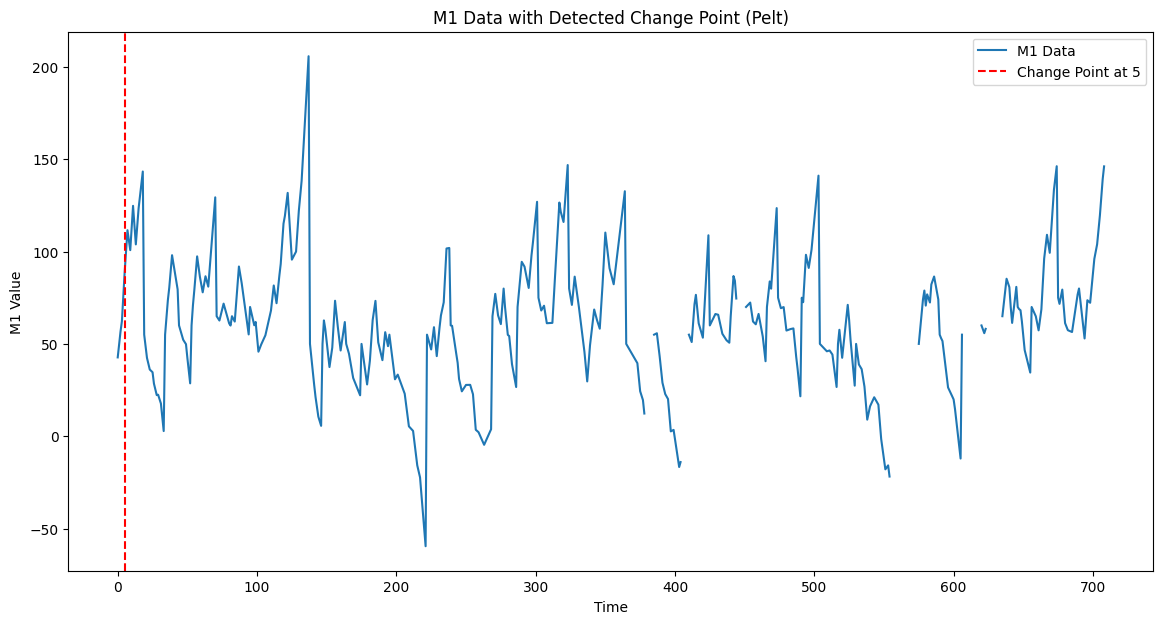

In [2]:
import pandas as pd
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt

# 读取Excel文件并提取第一场比赛的数据
file_path = "D:/FSS/MMM/MCM/24C/Momentum_Calculated.xlsx"
df = pd.read_excel(file_path)
first_match_id = df['match_id'].unique()[0]
first_match_data = df[df['match_id'] == first_match_id]

# 提取M1列的数据
m1_data = first_match_data['M1'].values

# 创建一个断点检测对象 (Pelt)
model = "l2"  # L2 cost function
algo = rpt.Pelt(model=model, min_size=2).fit(m1_data.reshape(-1, 1))
result = algo.predict(pen=10)

# 结果中的第一个元素是变化点的位置
change_point = result[0]

# 绘制原始数据和检测到的拐点
plt.figure(figsize=(14, 7))
plt.plot(m1_data, label='M1 Data')
plt.axvline(x=change_point, color='red', linestyle='--', label=f'Change Point at {change_point}')
plt.title('M1 Data with Detected Change Point (Pelt)')
plt.xlabel('Time')
plt.ylabel('M1 Value')
plt.legend()
plt.show()





### **TASK FOUR**  
**FEEL FREE TO CREATE**